#Business Case: LoanTap Logistic Regression

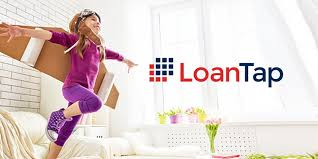

#About LoanTap:-

LoanTap is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.

The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.

LoanTap deploys formal credit to salaried individuals and businesses 4 main financial instruments:

1. Personal Loan

2. EMI Free Loan

3. Personal Overdraft

4. Advance Salary Loan

LoanTap offers innovative loans to help millennials achieve a life that they desire.We differentiate in otherwise cluttered Personal Loan segment and deliver fastest Personal Loans at customer friendly terms.
LoanTap has in-house RBI registered NBFC. Our focus is to delight our customers by helping them choose best loan products.

We boast of an experienced leadership and highly talented team, making us one of the fastest growing & trusted.


This case study will focus on the underwriting process behind Personal Loan only

##Defining Business Problem Statement

Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?

Assuming you are a data scientist at LoanTap, you are tasked with analyzing the
dataset to determine the creditworthiness of potential borrowers. Your udfimate objective is to build a logistic regression model, evaluate its performance, and provide actionable insights for the underwriting process.


● LoanTap is at the forefront of offering tailored financial solutions to millennials.

● Their innovative approach seeks to harness data science for refining their credit underwriting process.

● The focus here is the Personal Loan segment. A deep dive into the dataset can
reveal patterns in borrower behavior and creditworthiness.

● Analyzing this dataset can provide crucial insights into the financial behaviors, spending habits, and potential risk associated with each borrower.

● The insights gained can optimize loan disbursal, balancing customer outreach
with risk management.

##Dataset:

1. loan_amnt: Amount borrower applied for.

2. term: Loan duration (36 or 60 months).

3. int_rate: Interest rate on loan.

4. installment: Monthly repayment amount.

5. grade: LoanTap assigned loan grade (Risk ratings by LoanTap.)

6. sub_grade: LoanTap assigned loan grade (Risk ratings by LoanTap.)

7. emp_title: Borrower's job title.

8. emp_length: Duration of borrower's employment (0-10 years).

9. home_ownership: Borrower's housing situation (own, rent, etc.).

10. annual_inc: Borrower's yearly income.

11. verification_status: Whether borrower's income was verified.

12. issue_d: Loan issuance month.

13. loan_status: Current status of the loan.

14. purpose: Borrower's reason for the loan.

15. title: The loan's title provided by the borrower.

16. dti (Debt-to-Income ratio): Monthly debt vs. monthly income ratio.

17. earliest_cr_line: Date of borrower's oldest credit account.

18. open_acc: Number of borrower's active credit lines.

19. pub_rec: Negative records on borrower's public credit profile.

20. revol_bal: Total credit balance.

21. revol_util: Usage percentage of 'revolving' accounts like credit cards.

22. total_acc: Total number of borrower's credit lines.

23. initial_list_status: Loan's first category ('W' or 'F').

24. application_type: Individual or joint application.

25. mort_acc: Number of borrower's mortgages.

26. pub_rec_bankruptcies: Bankruptcy records for borrower.

27. Address: Borrower's location.

#What does ‘good’ like?

#### Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("logistic_regression.csv")

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [ ]:
df.head(10)

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.shape

In [ ]:
df.isnull().sum()

In [ ]:
df.nunique()

In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
# Extraction of pincode from the 'Address' column

df["issue_d"]=pd.to_datetime(df["issue_d"])

In [ ]:
df["earliest_cr_line"]=pd.to_datetime(df["earliest_cr_line"])

In [ ]:
# Extraction of pincode from the 'Address' column

df["pincode"] = df["address"].str.split(" ").str[-1]

In [ ]:
df["zipcode"] = df["address"].apply(lambda x: str(x)[-5:] if isinstance(x, str) else None)


In [ ]:
# Dropping the columns from which the requried data is extracted above

columns_to_drop = ['earliest_cr_line', 'address', 'issue_d']
df = df.drop(columns=columns_to_drop)

In [ ]:
# Conversion of 'Categorical' data from 'object' to 'Category' datatype

cat_cols = [
            'term', 'grade','sub_grade','home_ownership',
            'verification_status','loan_status','purpose',
            'initial_list_status','application_type',
            'title', 'emp_title', 'pincode'
           ]

df[cat_cols] = df[cat_cols].astype('category')

In [ ]:
df.info()

In [ ]:
df.describe().round(2)

In [ ]:
df["home_ownership"].value_counts(normalize=True)*100

In [ ]:
df["grade"].value_counts(normalize=True)*100

In [ ]:
df["term"].value_counts(normalize=True)*100

In [ ]:
df["application_type"].value_counts(normalize=True)*100

In [ ]:
df["loan_status"].value_counts(normalize=True)*100

In [ ]:
df.verification_status.value_counts(normalize=True)*100

<Axes: xlabel='loan_amnt', ylabel='loan_status'>

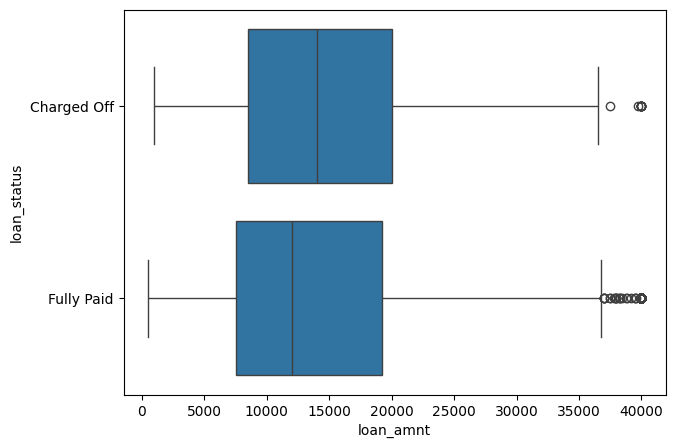

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(x=df["loan_amnt"], y=df["loan_status"])

##Univarite Analysis

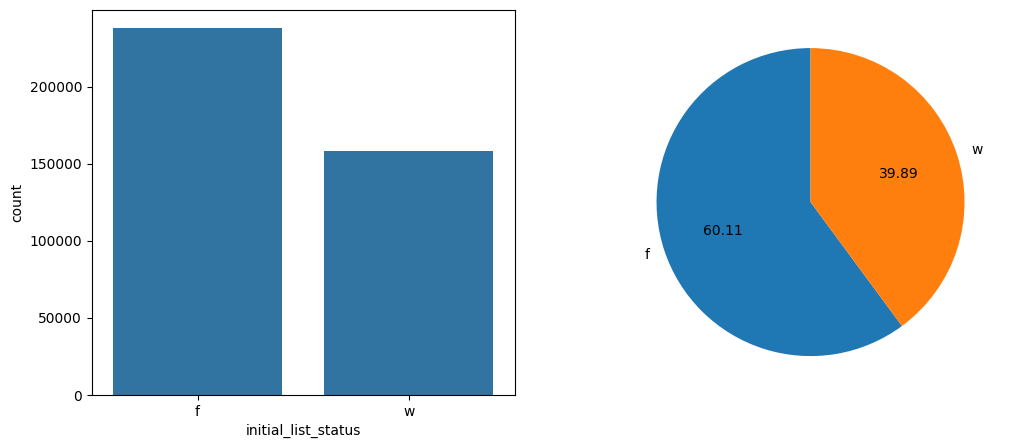

In [ ]:
# Observing the unique values

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)

sns.countplot(data = df,x = "initial_list_status")
initial_list_statuscount = df["initial_list_status"].value_counts()

plt.subplot(1,2,2)
plt.pie(
initial_list_statuscount,
labels=initial_list_statuscount.index,
startangle=90,
autopct="%.2f")

plt.show()

###Insights Fig.1
From Fig.1, it can be observed that the number of applicants for 'Fractional (f)' loan is higher
than the applicants for 'Whole (w)' Loan. It can also be observed that the 'Loan Repayment' to
'Charged Off' ratio is high for both the above mentioned initial list status.

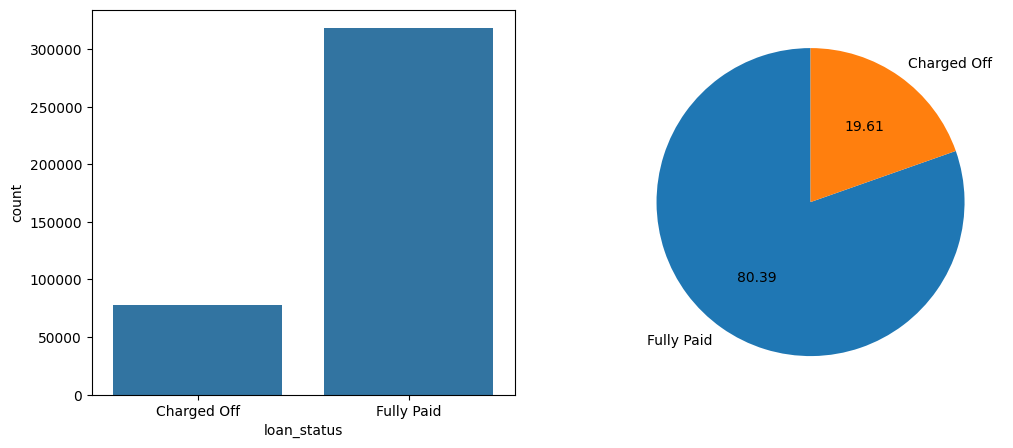

In [ ]:
# Observing the unique values

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)

sns.countplot(data = df,x = "loan_status")
initial_list_statuscount = df["loan_status"].value_counts()

plt.subplot(1,2,2)
plt.pie(
initial_list_statuscount,
labels=initial_list_statuscount.index,
startangle=90,
autopct="%.2f")

plt.show()

###Insights Fig.2
From Fig.2, it can be observed that the loans are majorly taken for the purpose of
'debt_consolidation' and 'credit_card' spends. It can also be observed that the 'Loan Repayment'
to 'Charged Off' ratio is high for both the above mentioned purposes.

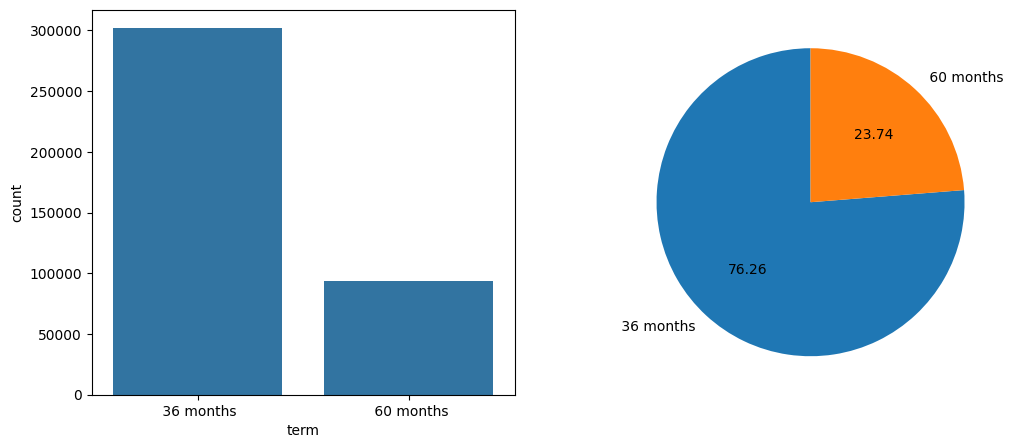

In [ ]:
# Observing the unique values

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)

sns.countplot(data = df,x = "term")
initial_list_statuscount = df["term"].value_counts()

plt.subplot(1,2,2)
plt.pie(
initial_list_statuscount,
labels=initial_list_statuscount.index,
startangle=90,
autopct="%.2f")

plt.show()

###Insights Fig.3
From Fig.3, it can be observed that there are higher number of applicants for shorter loan tenure
(i.e. 36 months). It can also be observed that the ratio of 'Loan Repayment' to 'Charge Off' is
much higher for loans taken for shorter duration (i.e. 36 months) than loans taken for longer
duration (i.e. 60 months). Applicants are more likely to repay the loan for '36 months' tenure.

It is apparent that the 'employee title' and
'title' columns do not follow a pattern. The sheer volume of unique values, ranging in the
hundreds of thousands suggests a lack of structured categorization. As a result, these columns
will be excluded from subsequent analysis due to their limited potential for meaningful insights.

In [ ]:
# Dropping the columns 'emp_title' and 'title'
columns_to_drop = ['emp_title', 'title']
df = df.drop(columns=columns_to_drop)

# Bivariate Analysis

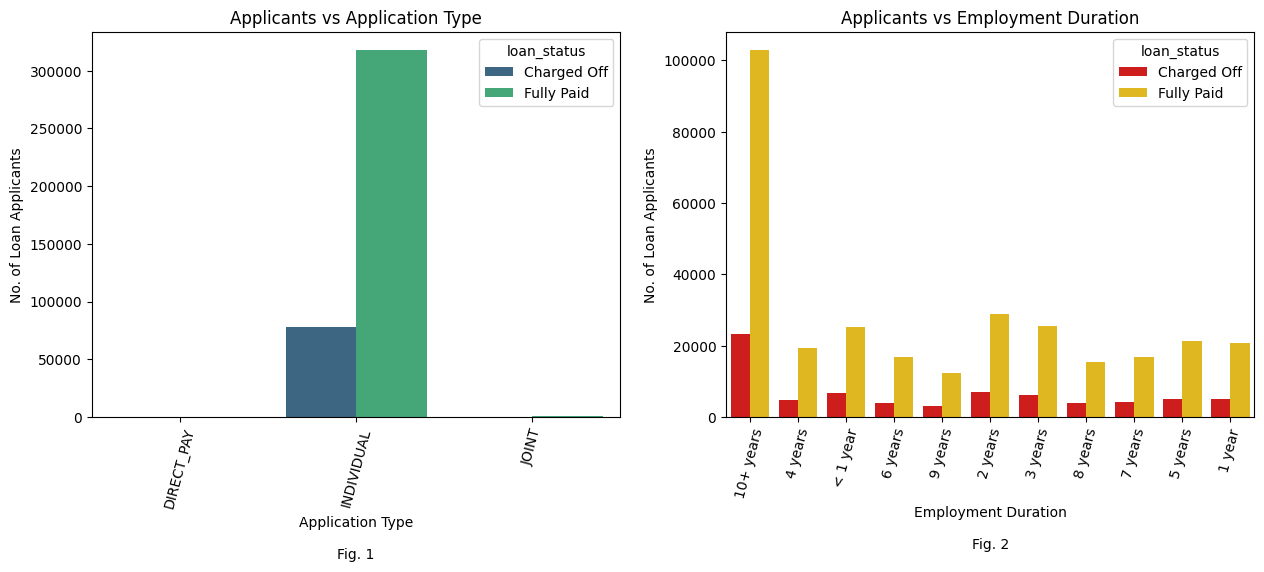

In [ ]:
# Check the distribution of data for the categorical columns ->
'application_type', 'emp_length'
plt.figure(figsize=(15,5))
x_col = ['application_type', 'emp_length']
x_lab = ['Application Type', 'Employment Duration']
pal = ['viridis', 'hot', 'flare']

# Create subplots for the columns in consideration
for i in range(len(x_col)):
  plt.subplot(1, len(x_col), i+1)

  # Plot countplot using Seaborn
  sns.countplot(data=df, x=x_col[i], palette=pal[i],
  hue='loan_status')
  plt.xticks(rotation=75)

  # Add labels and title
  plt.xlabel(f"{x_lab[i]}\n\nFig. {i+1}")
  plt.ylabel('No. of Loan Applicants')
  plt.title(f'Applicants vs {x_lab[i]}')

if i==2:
  plt.xticks(rotation = 75)

####Insights
####Fig.1
From Fig.1, it can be observed that the majority of loan applicants that approach 'LoanTap' are for 'Individual' application type and almost negligible for 'Direct Pay' and 'Joint' application type .
It can also be observed that the 'Loan Repayment' to 'Charged Off' ratio is high for 'Individual' application type.

####Fig.2
From Fig.2, it can be observed that the majority of loan applicants have '10+' years of employment duration i.e. applicants with 10+ years are more likely to take loans. It can also be observed that the 'Loan Repayment' to 'Charged Off' ratio is high for all the range of employment duration.

# Bivariate Analysis

<Axes: xlabel='sub_grade'>

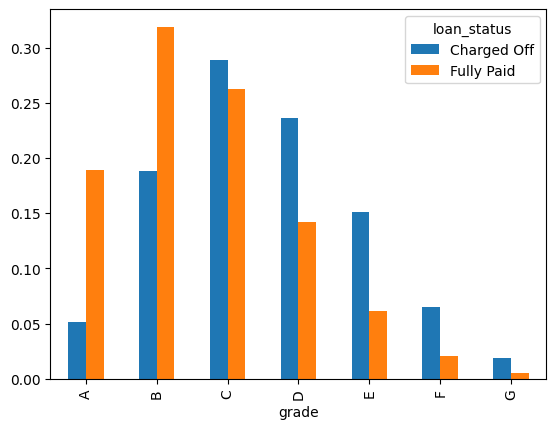

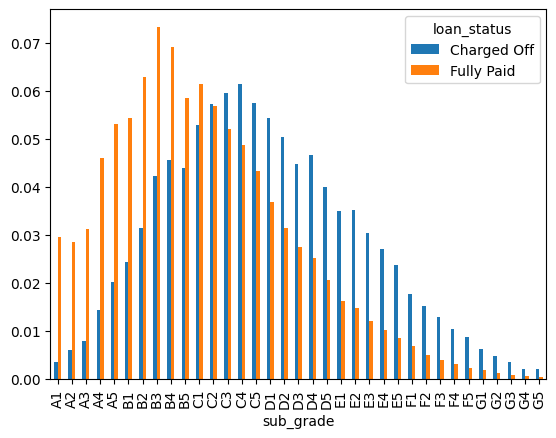

In [ ]:
pd.crosstab(index = df["grade"], columns= df["loan_status"],normalize= "columns").plot(kind  = "bar")

pd.crosstab(index = df["sub_grade"], columns= df["loan_status"],normalize= "columns", ).plot(kind = "bar")

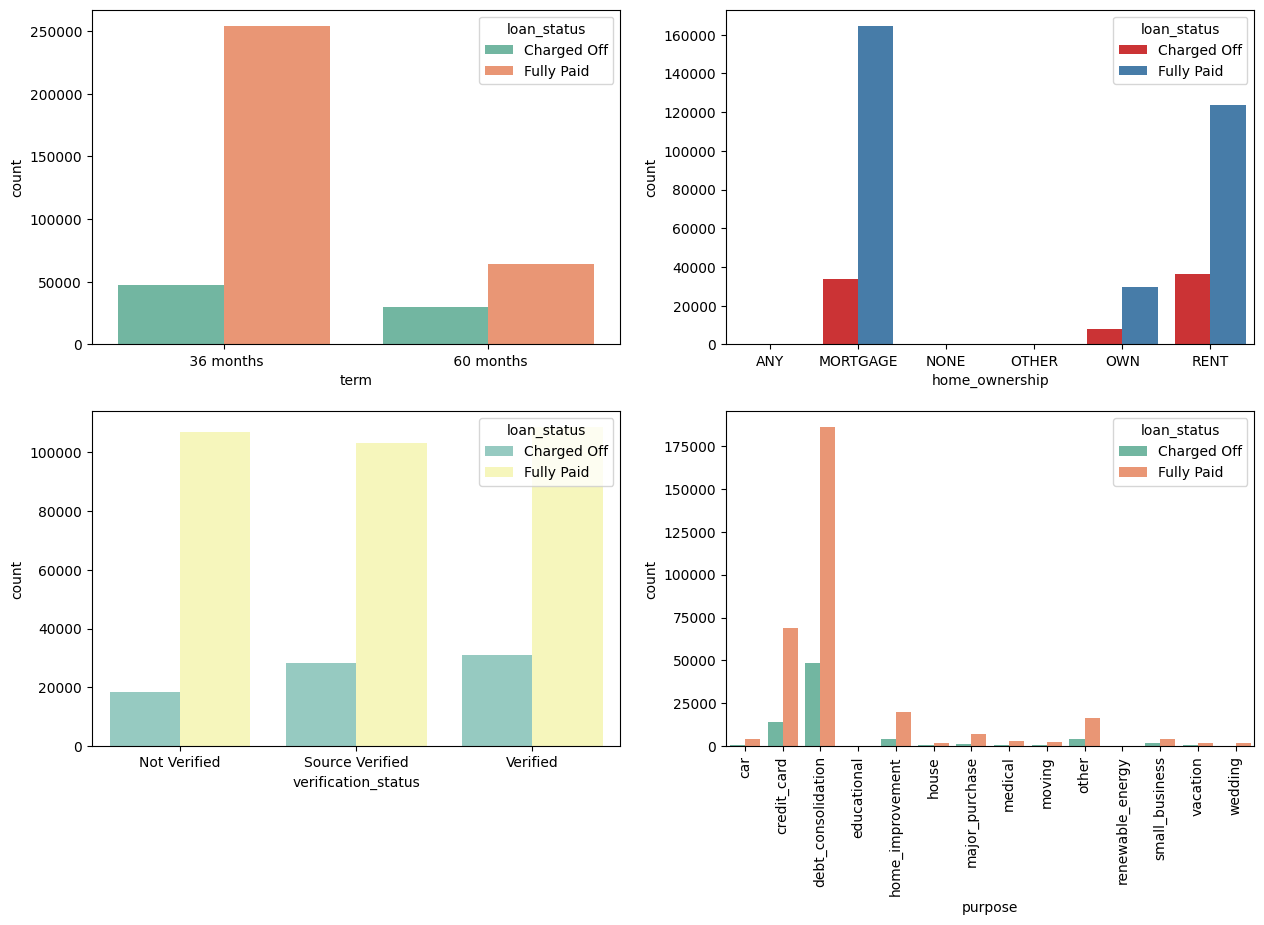

In [ ]:
plt.figure(figsize=(15,20))

plt.subplot(4,2,1)
sns.countplot(x='term',data=df,hue='loan_status', palette='Set2')

plt.subplot(4,2,2)
sns.countplot(x='home_ownership',data=df,hue='loan_status', palette='Set1')

plt.subplot(4,2,3)
sns.countplot(x='verification_status',data=df,hue='loan_status', palette='Set3')

plt.subplot(4,2,4)
g=sns.countplot(x='purpose',data=df,hue='loan_status', palette='Set2')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.show()

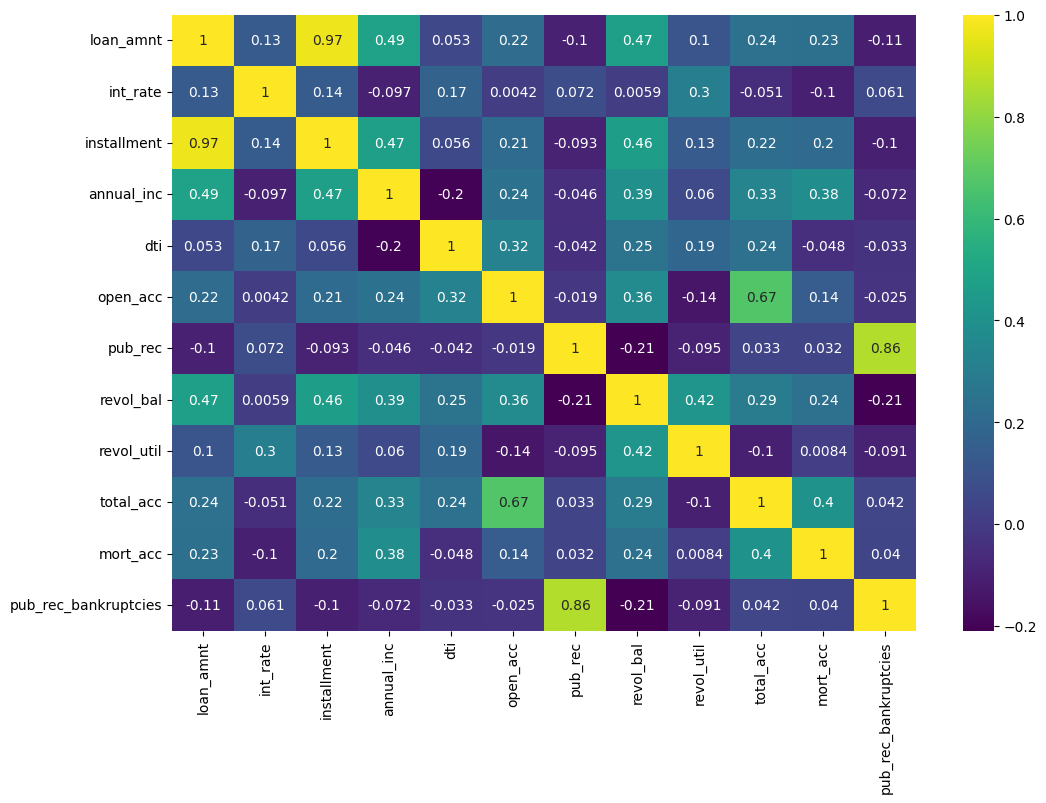

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Plot the heatmap using only numeric columns
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(method='spearman'), annot=True, cmap='viridis')
plt.show()


# Data Processing

In [ ]:
df.duplicated().sum()

0

In [ ]:
mode=df["emp_length"].mode()[0]
df["emp_length"]=df["emp_length"].fillna(mode)

In [62]:
# Display the total number of null values for each column
df.isnull().sum()

,0
loan_amnt,0
term,395845
int_rate,0
installment,0
grade,0
home_ownership,0
annual_inc,0
verification_status,0
loan_status,395845
purpose,0


In [63]:
# Null values replaced by 'Mean' in case of 'Numerical' column.
for column in ["mort_acc","pub_rec_bankruptcies","revol_util"]:
    mean=df[column].mean()
    df[column]=df[column].fillna(mean)


In [68]:
# Verify total number of null values for each column is '0'
df.isna().sum()

,0
loan_amnt,0
term,395845
int_rate,0
installment,0
grade,0
home_ownership,0
annual_inc,0
verification_status,0
loan_status,395845
purpose,0


In [69]:
#Encoding of target variable 'loan_staus' to convert from 'Category' to 'Integer' data type
df['loan_status'] = df['loan_status'].replace('Fully Paid', 1)
df['loan_status'] = df['loan_status'].replace('Charged Off', 0)
df['loan_status']

,loan_status
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
396025,NaN
396026,NaN
396027,NaN
396028,NaN


In [ ]:
columns_to_drop = ['issue_d', 'emp_title', 'title', 'sub_grade', 'address', 'earliest_cr_line', 'emp_length']
for col in columns_to_drop:
    if col in df.columns:
        df.drop(columns=[col], axis=1, inplace=True)

In [47]:
def  pub_rec(number):
    if number == 0:
        return 0
    else:
        return 1

def mort_acc(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number


def pub_rec_bankruptcies(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number

In [49]:
df['pub_rec']=df.pub_rec.apply(pub_rec)
df['mort_acc']=df.mort_acc.apply(mort_acc)
df['pub_rec_bankruptcies']=df.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)

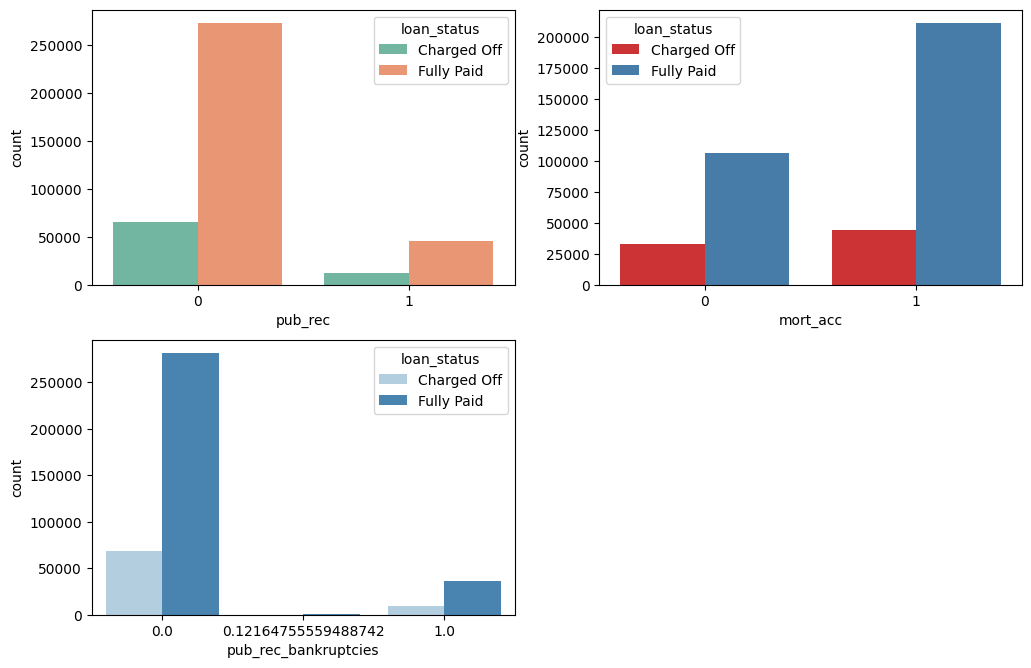

In [51]:
plt.figure(figsize=(12,25))

plt.subplot(6,2,1)
sns.countplot(x='pub_rec',data=df,hue='loan_status', palette='Set2')

plt.subplot(6,2,2)
sns.countplot(x='mort_acc',data=df,hue='loan_status', palette='Set1')

plt.subplot(6,2,3)
sns.countplot(x='pub_rec_bankruptcies',data=df,hue='loan_status', palette='Blues')
plt.show()

In [53]:
df['loan_status']=df.loan_status.map({'Fully Paid':0, 'Charged Off':1})
df['term']=df.term.map({'36 months':36, '60 months':60})
df['initial_list_status']=df.initial_list_status.map({'w':0, 'f':1})

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   loan_amnt             396030 non-null  float64 
 1   term                  0 non-null       float64 
 2   int_rate              396030 non-null  float64 
 3   installment           396030 non-null  float64 
 4   grade                 396030 non-null  category
 5   home_ownership        396030 non-null  category
 6   annual_inc            396030 non-null  float64 
 7   verification_status   396030 non-null  category
 8   loan_status           0 non-null       float64 
 9   purpose               396030 non-null  category
 10  dti                   396030 non-null  float64 
 11  open_acc              396030 non-null  float64 
 12  pub_rec               396030 non-null  int64   
 13  revol_bal             396030 non-null  float64 
 14  revol_util            396030 non-nul

# Outlier Detection And Treatment

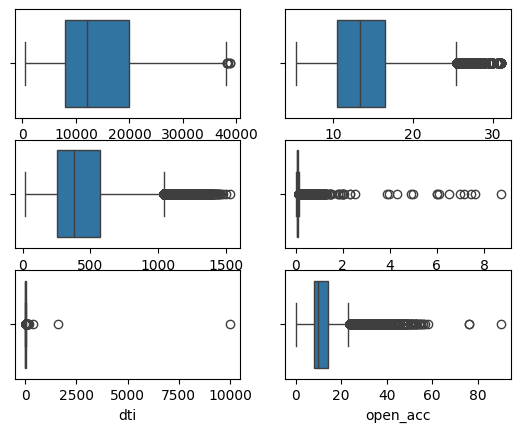

In [70]:
# Scatter plot and Histogram of 'Public Credit Profileplt.figure(figsize=(20,20))
plt.subplot(3,2,1)
sns.boxplot(data=df,x="loan_amnt")
plt.subplot(3,2,2)
sns.boxplot(data=df,x="int_rate")
plt.subplot(3,2,3)
sns.boxplot(data=df,x="installment")
plt.subplot(3,2,4)
sns.boxplot(data=df,x="annual_inc")
plt.subplot(3,2,5)
sns.boxplot(data=df,x="dti")
plt.subplot(3,2,6)
sns.boxplot(data=df,x="open_acc")
plt.show()

In [57]:
mean1=df["loan_amnt"].mean()
std1=df["loan_amnt"].std()
upper_limit=mean1+3*std1
lower_limit=mean1-3*std1
df=df.loc[(df["loan_amnt"]<upper_limit) & (df["loan_amnt"]>lower_limit)]

## Train/Test Split

In [111]:
from sklearn.model_selection import train_test_split
x=df.drop(["loan_status"],axis=1)
y=df["loan_status"]
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=3,test_size=0.2)

In [112]:
print(x_train.shape)
print(x_test.shape)

(315139, 26)
(78785, 26)


In [110]:
#Encoding of target variable 'loan_staus' to convert from 'Category' to 'Integer' data type
df['loan_status'] = df['loan_status'].replace('Fully Paid', 1)
df['loan_status'] = df['loan_status'].replace('Charged Off', 0)
df['loan_status']

,loan_status
0,1
1,1
2,1
3,1
4,0
...,...
396025,1
396026,1
396027,1
396028,1


Text(0.5, 1.0, 'Loan Amount vs Annual Income')

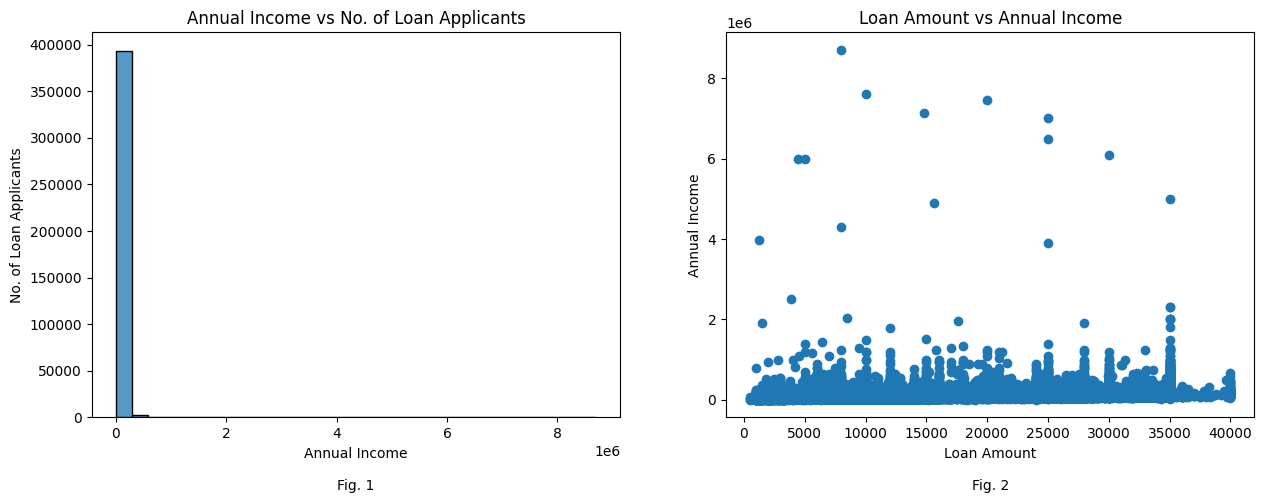

In [79]:
# Extraction and Conversion of data from categorical columns
df['months'] = df['term'].str.split(' ').str[-2]
df['months'] = pd.to_numeric(df['months'])
df['emp_length'] = df['emp_length'].str.split(" ").str[-2]
df['updt_emp_length_yrs'] = df['emp_length'].replace('10+', '10')
df['updt_emp_length_yrs'] = pd.to_numeric(df['updt_emp_length_yrs'])
df = df.drop(columns= ['term', 'emp_length'])
df.head()
{"type":"dataframe","variable_name":"df"}

# Scatter plot and Histogram of Annual Income
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='annual_inc', bins=30)
plt.xlabel(f'Annual Income\n\nFig. 1')
plt.ylabel('No. of Loan Applicants')
plt.title('Annual Income vs No. of Loan Applicants')
plt.subplot(1, 2, 2)
plt.scatter(x = df['loan_amnt'], y = df['annual_inc'])
plt.xlabel(f'Loan Amount\n\nFig. 2')
plt.ylabel('Annual Income')
plt.title('Loan Amount vs Annual Income')

Text(0.5, 1.0, 'Loan Amount vs Annual Income')

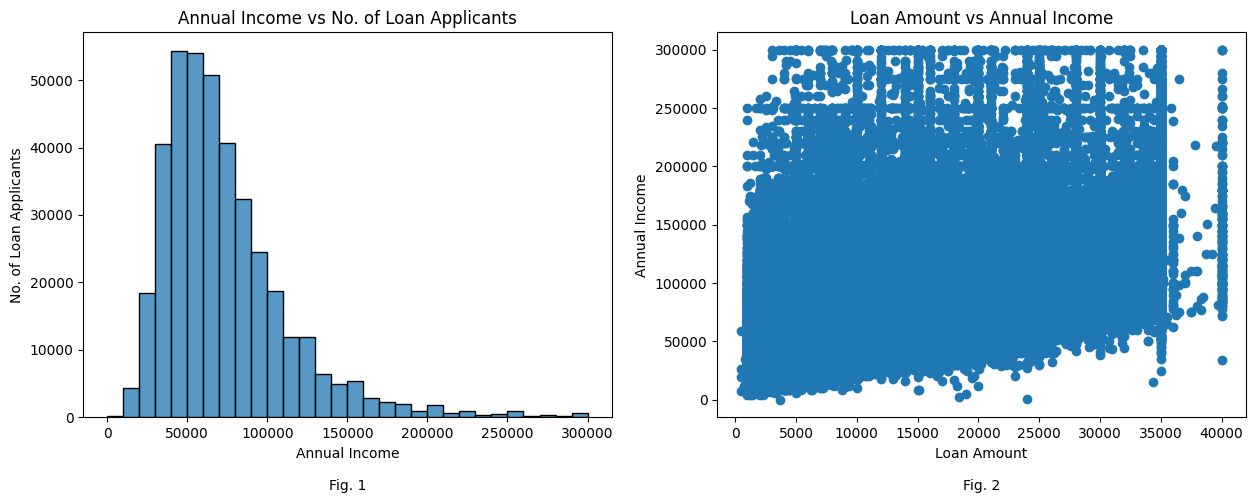

In [81]:
# Scatter plot and Histogram of Annual Income after removal of outliers
plt.figure(figsize=(15,5))
df = df[df['annual_inc'] <= 300000]
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='annual_inc', bins=30)
plt.xlabel(f'Annual Income\n\nFig. 1')
plt.ylabel('No. of Loan Applicants')
plt.title('Annual Income vs No. of Loan Applicants')
plt.subplot(1, 2, 2)
plt.scatter(x = df['loan_amnt'], y = df['annual_inc'])
plt.xlabel(f'Loan Amount\n\nFig. 2')
plt.ylabel('Annual Income')
plt.title('Loan Amount vs Annual Income')

After the outliers are removed at 300000 threshold the histogram and the scatter plot look like
Fig. 1 and Fig. 2 above. The data is now more evenly distributed than before.

Text(0.5, 1.0, 'Loan Amount vs Debt to Income Ratio')

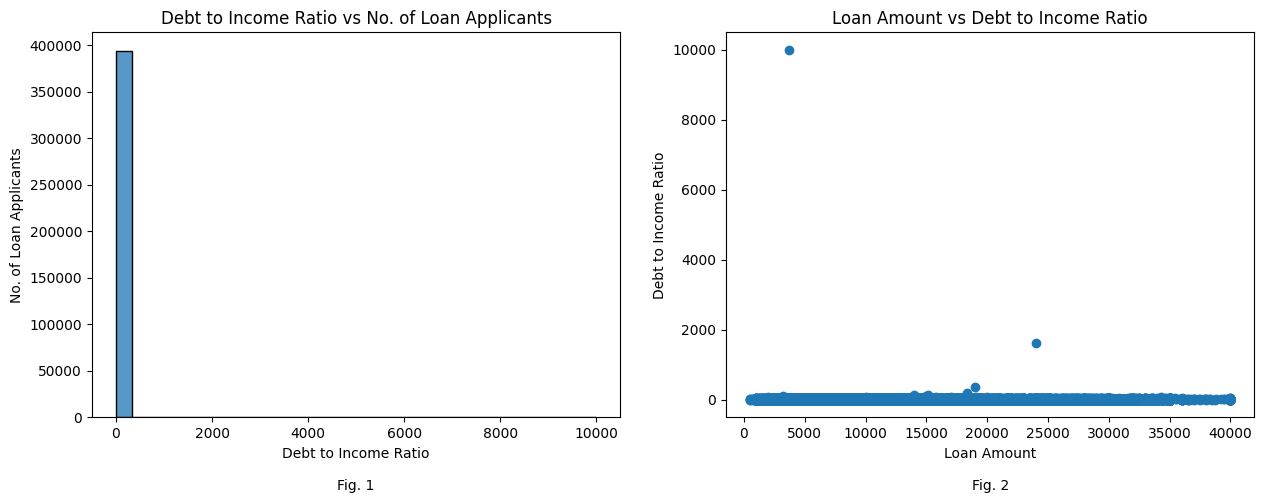

In [82]:
# Scatter plot and Histogram of Debt to Income Ratio
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='dti', bins=30)
plt.xlabel(f'Debt to Income Ratio\n\nFig. 1')
plt.ylabel('No. of Loan Applicants')
plt.title('Debt to Income Ratio vs No. of Loan Applicants')
plt.subplot(1, 2, 2)
plt.scatter(x = df['loan_amnt'], y = df['dti'])
plt.xlabel(f'Loan Amount\n\nFig. 2')
plt.ylabel('Debt to Income Ratio')
plt.title('Loan Amount vs Debt to Income Ratio')

Text(0.5, 1.0, 'Loan Amount vs Debt to Income Ratio')

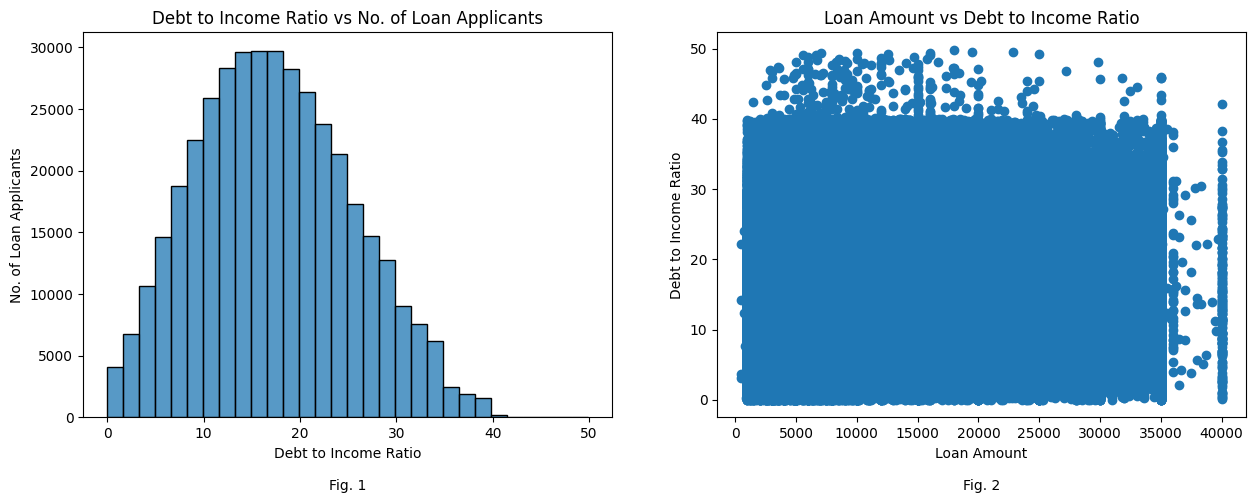

In [83]:
# Scatter plot and Histogram of Debt to Income Ratio
plt.figure(figsize=(15,5))
df = df[df['dti'] <= 50]
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='dti', bins=30)
plt.xlabel(f'Debt to Income Ratio\n\nFig. 1')
plt.ylabel('No. of Loan Applicants')
plt.title('Debt to Income Ratio vs No. of Loan Applicants')
plt.subplot(1, 2, 2)
plt.scatter(x = df['loan_amnt'], y = df['dti'])
plt.xlabel(f'Loan Amount\n\nFig. 2')
plt.ylabel('Debt to Income Ratio')
plt.title('Loan Amount vs Debt to Income Ratio')

Text(0.5, 1.0, 'Loan Amount vs Public Credit Profile(-ve record)')

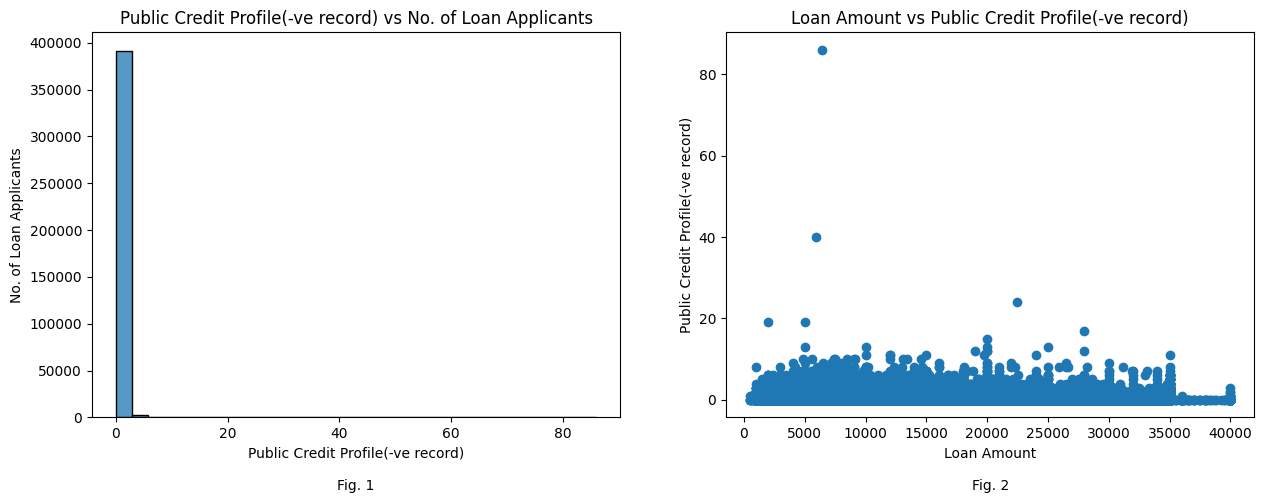

In [85]:
# Scatter plot and Histogram of 'Public Credit Profile(-ve record)'
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='pub_rec', bins=30)
plt.xlabel(f'Public Credit Profile(-ve record)\n\nFig. 1')
plt.ylabel('No. of Loan Applicants')
plt.title('Public Credit Profile(-ve record) vs No. of Loan Applicants')
plt.subplot(1, 2, 2)
plt.scatter(x = df['loan_amnt'], y = df['pub_rec'])
plt.xlabel(f'Loan Amount\n\nFig. 2')
plt.ylabel('Public Credit Profile(-ve record)')
plt.title('Loan Amount vs Public Credit Profile(-ve record)')

Text(0.5, 1.0, 'DPublic Credit Profile(-ve record) vs No. of Loan Applicants')

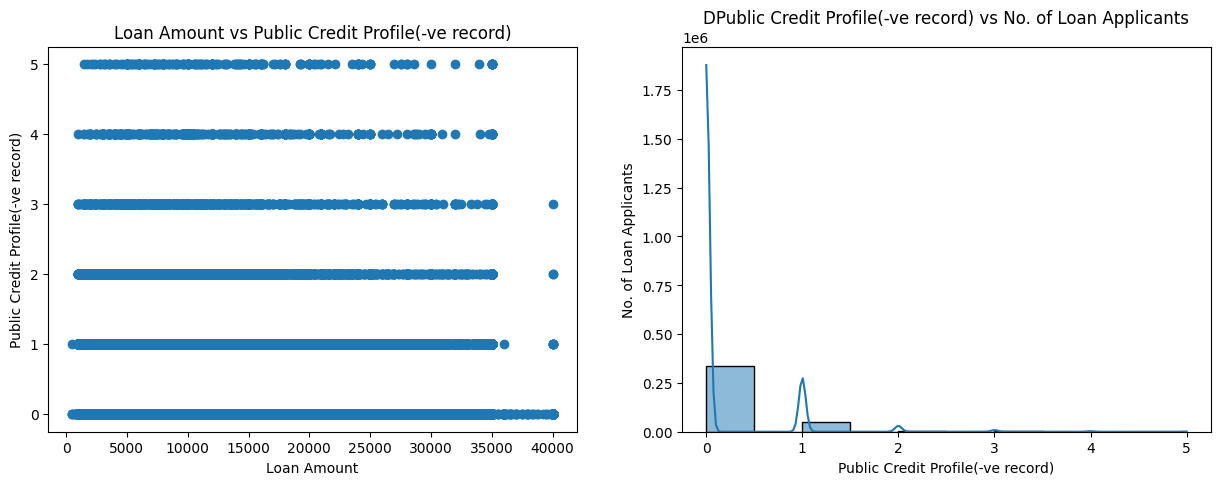

In [87]:
# Scatter plot and Histogram of 'Public Credit Profile(-ve record)' after removal of outliers
plt.figure(figsize=(15,5))
df = df[df['pub_rec'] < 6]
plt.subplot(1, 2, 1)
plt.scatter(x = df['loan_amnt'], y = df['pub_rec'])
plt.xlabel('Loan Amount')
plt.ylabel('Public Credit Profile(-ve record)')
plt.title('Loan Amount vs Public Credit Profile(-ve record)')
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='pub_rec', bins=10, kde=True)
plt.xlabel('Public Credit Profile(-ve record)')
plt.ylabel('No. of Loan Applicants')
plt.title('DPublic Credit Profile(-ve record) vs No. of Loan Applicants')

In [88]:
#Convert variables from 'Category' datatype to 'String' and 'Integer' datatype
for i in ('grade', 'sub_grade', 'home_ownership',
'verification_status', 'purpose', 'initial_list_status',
'application_type', 'pin_code'):
  df[i] = df[i].astype(str)
df['ecl_year'] = df['ecl_year'].astype(int)

# Encode the 'Categorical' variable using Label Encoder
from sklearn.preprocessing import LabelEncoder

# Separate features and target variable
X = df.drop(columns= ['loan_status'])
y = df['loan_status']

# Initialize LabelEncoder
label_encoder = LabelEncoder()
for i in ('grade', 'sub_grade','home_ownership',
'purpose','verification_status', 'initial_list_status',
'application_type', 'pin_code'):

  # Fit and transform the categorical column
  X[i] = label_encoder.fit_transform(X[i])

Categorical columns need to be converted to Numerical columns for the model to be trained
since Logistic Regression works on numerical values of the variables.

In [89]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 393924 entries, 0 to 396029
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             393924 non-null  float64
 1   int_rate              393924 non-null  float64
 2   installment           393924 non-null  float64
 3   grade                 393924 non-null  int64  
 4   sub_grade             393924 non-null  int64  
 5   emp_title             371145 non-null  object 
 6   home_ownership        393924 non-null  int64  
 7   annual_inc            393924 non-null  float64
 8   verification_status   393924 non-null  int64  
 9   purpose               393924 non-null  int64  
 10  title                 392177 non-null  object 
 11  dti                   393924 non-null  float64
 12  open_acc              393924 non-null  float64
 13  pub_rec               393924 non-null  float64
 14  revol_bal             393924 non-null  float64
 15  revol

In [92]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.3, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test,
test_size=0.5, random_state = 43)
print(f'Traning Data:\n{y_train.value_counts()}\n\nValidation Data:\
n{y_val.value_counts()}\n\nTesting Data:\n{y_test.value_counts()}')

Traning Data:
loan_status
1    221577
0     54169
Name: count, dtype: int64

Validation Data:nloan_status
1    47496
0    11593
Name: count, dtype: int64

Testing Data:
loan_status
1    47492
0    11597
Name: count, dtype: int64


In [76]:
import pandas as pd
#Reading the downloaded data
df = pd.read_csv("logistic_regression.csv")

# Extraction of year from the 'Earliest Credit Line' column
df['ecl_year'] = df['earliest_cr_line'].str.split('-').str[-1]

# Conversion of datatype from 'String' to 'Integer' for the 'Earliest Credit Line Year' column
df['ecl_year'] = pd.to_numeric(df['ecl_year'])

# Extraction of pincode from the 'Address' column
df['pin_code'] = df['address'].str.split(' ').str[-1]

# Extraction of pincode from the 'Address' column
df['issue_d_y'] = df['issue_d'].str.split('-').str[-1]

# Conversion of datatype from 'String' to 'Integer' for the 'Issue Date Year' column
df['issue_d_y'] = pd.to_numeric(df['issue_d_y'])
# Dropping the columns from which the requried data is extracted above
columns_to_drop = ['earliest_cr_line', 'address', 'issue_d']
df = df.drop(columns=columns_to_drop)

## MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=pd.DataFrame(scaler.fit_transform(x_train),columns=x_train.columns)
X_test=pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)

#####Recommendations

1. Tailored Loan Products: Develop tailored loan products for the most common borrower segments (B, C, and A grade borrowers) to enhance product-market fit.

2. Loan Term Structuring: Offer more flexible terms for higher-grade loans and consider stricter terms for longer-term and lower-grade loans to mitigate risk.

3. Further Statistical Analysis: Conduct further statistical tests to validate the significance of observed correlations and insights, ensuring that lending strategies are data-driven.

4. Monitoring and Adjustment of Models: Continuously monitor and adjust credit scoring models in response to changes in borrower behavior and economic conditions.